<a href="https://colab.research.google.com/github/daawonn/dl_project/blob/master/8_pyTorch%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **pyTorch** (파이토치)

## 개요
- https://pytorch.org/
- python/C++/Jave을 이용해 딥러닝 구현을 위한 오픈소스 라이브러리
- GPU 지원은 엔비디아만 가능(CUDA만 사용가능)
- Lua(루아,핵심사용언어), C++ 등으로 개발했다
- 아직까지는 텐서플로우가 더 많이 사용되나 점차 확산하고있는 추세
- Facebook 인공지능팀 개발(=뉴욕대 협업)
- 딥러닝 프레임워크(엔진)
- 장점
  - 복잡하고 계산양이 큰 그래프를 쉼게 구성한다.
  - 계산 그래프를 활용하면 미/적분도 간단하게 처리
  - GPU 연산을 손쉽게 활용하여 빠른 처리가 가능


## 특징
- numpy를 기반으로 Tensor 연산을 GPU로 수행가능
- 자동 미분 시스템을 이용하여 모델을 손쉽게 구성
- 같이 활용되는 python 패키지
  - Scipy
  - Numpy
  - Cython : 파이썬의 빠른 생산성, 외부 C라이브러리와 간결하게 연동, 실행속도를 향상
- 학습, 추론속도가 빠르고 다루기쉽다

## pyTorch vs Tensorflow

- 2019년도 기준 2위 (pyTorch) 1위 (Tensorflow)
- Tensorflow
  - Define-and-Run 방식
    - 1. 계산 그래프, 데이터 플로우 그래프를 설계
    - 2. 세션(session)에서 그래프에 들어갈 데이터(숫자, 수치값)를 주입
    - 3. 세션 실행
  - 산업용으로 많이 사용

- pyTorch
  - Define-by-Run 방식
    - 1. 계산 그래프를 그리는 동시에 
    - 2. 주입할 데이터(숫자, 수치값)를 보관하고
    - 3. 연산 실행이 바로 가능하다
  - 학계, 연구용으로 많이 사용, 2018년에 1.0이 런칭된 후 산업용으로도 넓히고있다.
    

In [0]:
import torch

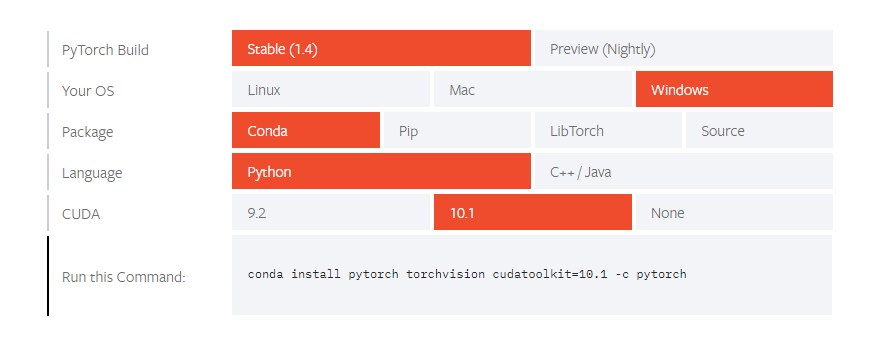

In [0]:
# 로컬 pc나 딥러닝 서버에서 사용한다면 https://pytorch.org/ 에서 안정화된 버전으로 다운받기!
from IPython.display import Image
Image('/content/pytorch.png', width=600)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 텐서 

- 딥러닝은 텐서를 기반으로 진행되는 계산(연산)의 연속
- 딥러닝 구현상 가장 중요한 기본 단위

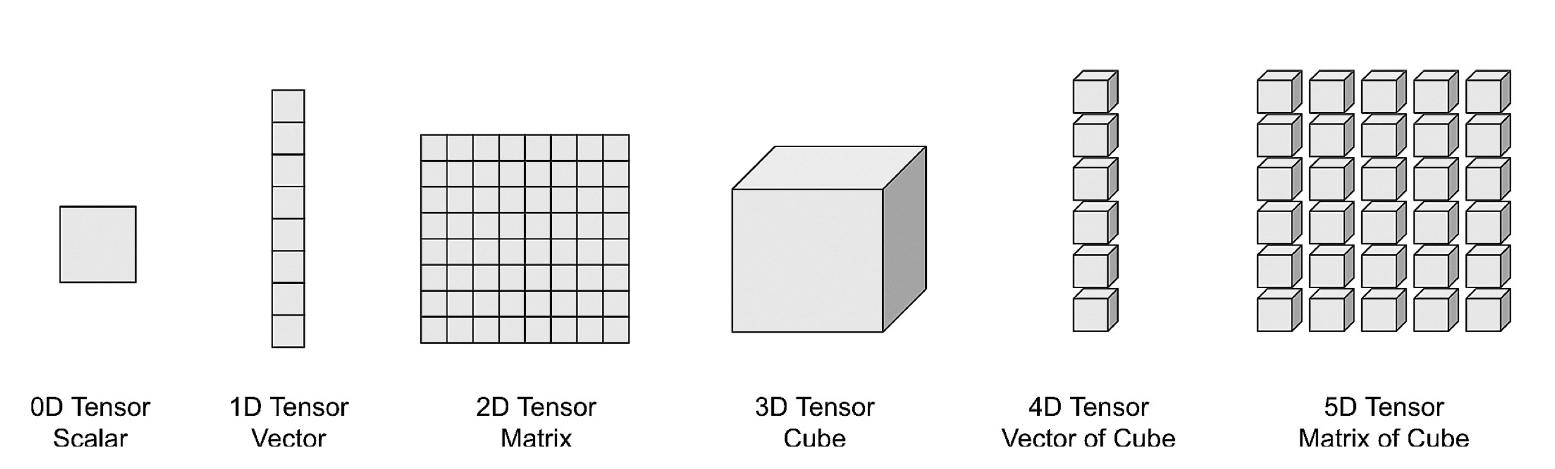

In [0]:
Image('/content/8.tensor.jpeg', width=500)

# 텐서생성

- Tensor( 리스트 or 배열)
  - 원소가 정수에서 float32로 자동 변환
  - 단, 옵션에 따라서 유지될 수도 있지않을까?

In [0]:
# 리스트로부터 텐서 생성
list_src = [ [10,11,12],[20,21,22] ] # (2,3)
# 텐서생성
x = torch.Tensor( list_src )
x
# define by run 이라는 취지에서 이미 텐서에 데이터가 설정되어 있음을 알 수 있다

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
# 복원 : 텐서 -> 리스트 추출 : to
x.tolist()

[[10.0, 11.0, 12.0], [20.0, 21.0, 22.0]]

In [0]:
# numpy의 ndarray(배열)을 재료로 텐서 생성
arr = np.array( x.tolist() )
arr

array([[10., 11., 12.],
       [20., 21., 22.]])

In [0]:
x = torch.Tensor( list_src )
x

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
# 복원 -> 타입복구가 불가 (형변환 하기전까지)
x.numpy()

array([[10., 11., 12.],
       [20., 21., 22.]], dtype=float32)

# GPU 사용

- colab에서 노트 속성을 gpu 사용으로 변경
  - 런타임이 다 초기화 된다
  


## pyTorch GPU 사용

In [0]:
type(x)

torch.Tensor

In [0]:
x.device

device(type='cpu')

In [0]:
# NVIDIA
device = 'cuda'
try:
  x = x.to(device)
  print('%s 지원' % device)
except Exception as e:
  print('%s 미지원' % device, e)  

cuda 지원


In [0]:
# 이 텐서는 GPU 에서 연산한다 -> 텐서별로 GPU, CPU를 지정할 수 있다
x.device

device(type='cuda', index=0)

In [0]:
# 텐서를 cpu 연산으로 변경 처리
x = x.to('cpu')
x.device

device(type='cpu')

## Tensorflow GPU 사용

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
# 지원되는 하드웨어
from tensorflow.python.client import device_lib

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
# 지원되는 하드웨어 목록중에서 device_type: "GPU"
# name: "/device:GPU:0" 이름을 챙겨둔다!
# memory_limit: 14224857498 메모리 제한크기를 확인하여 차후 학습시 batch_size에 대한 가이드를 잡는다
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2645962407561103735, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16485941450050271216
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14500538963924562904
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14224857498
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4124030990733712817
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
# GPU 연산
# 통상적으로 Session이 열리는 지점부터 사용한다
# 여기서는 간단하게 표현만 확인
with tf.device("/device:GPU:0"):
  a = tf.constant( [[1,2,3],[4,5,6]] )    #2x3
  b = tf.constant( [[1,2],[3,4],[5,6]] )  #3x2
  c = tf.matmul(a , b)
  print(c)

Tensor("MatMul:0", shape=(2, 2), dtype=int32, device=/device:GPU:0)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [0]:
# GPU 연산
# 통상적으로 Session이 열리는 지점부터 사용한다
# 여기서는 간단하게 표현만 확인
tf.reset_default_graph()
with tf.device("/device:GPU:0"):
  a = tf.constant( [[1,2,3],[4,5,6]] )    #2x3
  b = tf.constant( [[1,2],[3,4],[5,6]] )  #3x2
  c = tf.matmul(a , b)
  print(c)
  # 데이터 플로우 그래프 실행
  with tf.Session() as sess:
    print(sess.run(c))

Tensor("MatMul:0", shape=(2, 2), dtype=int32, device=/device:GPU:0)


InvalidArgumentError: ignored

In [0]:
with tf.device("/CPU:0"):
  a = tf.constant( [[1,2,3],[4,5,6]] )    #2x3
  b = tf.constant( [[1,2],[3,4],[5,6]] )  #3x2
  c = tf.matmul(a , b)
  print(c)

Tensor("MatMul_1:0", shape=(2, 2), dtype=int32, device=/device:CPU:0)


## Keras GPU 사용

In [0]:
from keras import backend as K

In [24]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
sess = tf.Session()
from keras.backend import tensorflow_backend as K
# 메모리가 부족하면 자동적으로 증가 
# GPU 메모리를 작업에 올인해서 사용하는가? 
# 일부만  사용하다가 부족하면 증설하는가?
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session( tf.Session(config=config) )


with tf.device( '/device:GPU:0' ):
  pass




sess.close()

# 텐서 생성2

## 랜덤 텐서

In [25]:
# 0 ~ 1 사이로 랜덤하게, 2x3 행렬을 생성해라
# 인자중에 *size => [가변인자], shape을 설명하는
torch.rand( 2,3 )

tensor([[0.5555, 0.5277, 0.8243],
        [0.5785, 0.4085, 0.9964]])

In [26]:
# 0 ~ 8 까지 랜덤 2x3 , 정수로
torch.randint( low=0, high=8, size=(2,3) )

tensor([[4, 3, 5],
        [6, 1, 1]])

In [29]:
# 제로텐서
torch.zeros( 2,2 ) # 영행렬을 생성

tensor([[0., 0.],
        [0., 0.]])

In [30]:
x = torch.ones(3,3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [31]:
# 매개변수의 x의 shape 과 동일한 텐서를 만들고 0으로 채운다
torch.zeros_like(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [32]:
torch.ones_like(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
# gpu를 이용해서 처리한다면
# torch.zeros_like(x.cuda())

In [33]:
# 실수형 텐서
a = torch.FloatTensor( np.array( [1,2,3,4] ))
a, type(a), a.type()
# 파이토치에서 타입확인은 : a.type()

(tensor([1., 2., 3., 4.]), torch.Tensor, 'torch.FloatTensor')

In [36]:
# 정수형 텐서
a = torch.LongTensor( np.array( [1,2,3,4,5] ))
a, type(a), a.type()
# 파이토치에서 타입확인은 : xxx.type()

(tensor([1, 2, 3, 4, 5]), torch.Tensor, 'torch.LongTensor')

In [35]:
# 불린형 텐서
a = torch.BoolTensor( np.array( [True, False, True] ))
a, type(a), a.type()
# 파이토치에서 타입확인은 : xxx.type()

(tensor([ True, False,  True]), torch.Tensor, 'torch.BoolTensor')

# 텐서 조작 (행렬조작)

- slicing
- view
- transpose
- squeeze, unsqeeze
- cat, stack
- 사칙연산 ( + - * )
- sum. mean
- max, argmax, min, argmin
- 논리연산

In [37]:
# 씨드(seed)고정 => 발생되는 난수의 순서를 고정 => 실험시 유용하게 변수(상황)들을 통제하기 위해서
# 512 : 임시 설정값
torch.manual_seed(512)

In [5]:
# 크기 2x3x4 3차(3d) Tensor(=큐브)
x = torch.randint( low=0, high=10, size=(2,3,4) )
x

tensor([[[4, 8, 6, 6],
         [7, 5, 6, 7],
         [5, 2, 7, 7]],

        [[6, 9, 0, 2],
         [7, 4, 2, 1],
         [3, 9, 7, 9]]])

## slicing

In [7]:
# 인덱싱은 전형적인 표현, { 1차, 2차, 3차,...} 이렇게도 표현 가능
x[0][0], x[0,0], x[0,0,0]

(tensor([4, 8, 6, 6]), tensor([4, 8, 6, 6]), tensor(4))

In [8]:
len(x)

2

In [0]:
# 텐서의 시각화 점수
# src : Tensor
def drawTensor(src):
  fig, axes = plt.subplots(len(src),1)
  for i in range( len(src) ):
    # src.numpy() : 텐서를 배열로 복원
    axes[i].matshow( src.numpy()[i], vmin=0, vmax=1, cmap='gray' )
    plt.show()

In [12]:
# 시각화 할 텐서 준비
tmp = torch.ones_like( x )
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

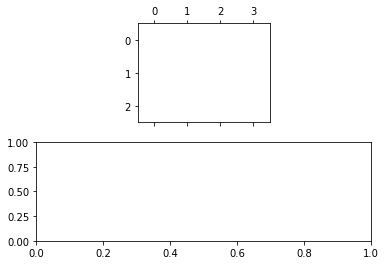

In [13]:
# 조작전 tmp를 드로잉 1이면 흰색
drawTensor(tmp)

In [16]:
# 원본 조작
tmp[0,2,3] = 0
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

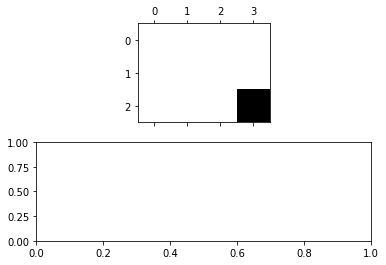

In [15]:
drawTensor(tmp)

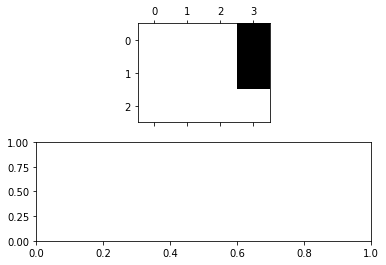

In [18]:
tmp = torch.ones_like( x )
# 차원별로 변경된 부분은 검토하면 간단하게 해결
# 1차원 -> 2차원 -> 3차원
tmp[0,:2,3] = 0
drawTensor(tmp)

- 텐서에서 특정 정보를 추출, 변경 할 경우
- 인덱싱(차원축소) or 슬라이싱을 통해서 처리가 가능
- 표현
  - 텐서명[1차,2차,3차,...]

## view
- 텐서의 shape을 변경 (=reshape)

In [19]:
x.shape, x, x.dtype, x.ndim

(torch.Size([2, 3, 4]), tensor([[[4, 8, 6, 0],
          [7, 5, 6, 0],
          [5, 2, 7, 7]],
 
         [[6, 9, 0, 2],
          [7, 4, 2, 1],
          [3, 9, 7, 9]]]), torch.int64, 3)

In [21]:
# shape 변경
x.reshape(2, 2, 6)

tensor([[[4, 8, 6, 0, 7, 5],
         [6, 0, 5, 2, 7, 7]],

        [[6, 9, 0, 2, 7, 4],
         [2, 1, 3, 9, 7, 9]]])

In [22]:
x.view(2,2,6)

tensor([[[4, 8, 6, 0, 7, 5],
         [6, 0, 5, 2, 7, 7]],

        [[6, 9, 0, 2, 7, 4],
         [2, 1, 3, 9, 7, 9]]])

In [23]:
# -1 을사용한다면 => 몇개나올지 모른다 => 알아서 맞춰달라
x.view(-1,1,12)

tensor([[[4, 8, 6, 0, 7, 5, 6, 0, 5, 2, 7, 7]],

        [[6, 9, 0, 2, 7, 4, 2, 1, 3, 9, 7, 9]]])

## transpose

- 차원의 맞교환
- (2,3,4) -> (3,2,4)


In [25]:
x.shape, x

(torch.Size([2, 3, 4]), tensor([[[4, 8, 6, 0],
          [7, 5, 6, 0],
          [5, 2, 7, 7]],
 
         [[6, 9, 0, 2],
          [7, 4, 2, 1],
          [3, 9, 7, 9]]]))

In [27]:
# 첫번째 차원과 두번째 차원을 교환
tmp2 = x.transpose( 0, 1)
tmp2, tmp2.shape

(tensor([[[4, 8, 6, 0],
          [6, 9, 0, 2]],
 
         [[7, 5, 6, 0],
          [7, 4, 2, 1]],
 
         [[5, 2, 7, 7],
          [3, 9, 7, 9]]]), torch.Size([3, 2, 4]))

## squeeze, unsqueeze
- squeeze : 크기가 1인 차원을 모두 제거
- unsqueeze : 특정 차원을 추가

In [28]:
x = torch.rand( (2,1,3,4,1) )
x

tensor([[[[[0.2823],
           [0.7216],
           [0.6258],
           [0.8947]],

          [[0.9567],
           [0.7623],
           [0.4167],
           [0.7152]],

          [[0.3116],
           [0.6880],
           [0.3316],
           [0.9006]]]],



        [[[[0.0077],
           [0.7536],
           [0.2119],
           [0.8693]],

          [[0.9445],
           [0.0088],
           [0.7532],
           [0.3338]],

          [[0.7240],
           [0.4314],
           [0.0432],
           [0.4888]]]]])

In [29]:
# 모든 차원에서 크기가 1인 차원을 제거하여 크기를 줄인다
# (2,3,4)
x.squeeze().size()

torch.Size([2, 3, 4])

In [30]:
x.squeeze()

tensor([[[0.2823, 0.7216, 0.6258, 0.8947],
         [0.9567, 0.7623, 0.4167, 0.7152],
         [0.3116, 0.6880, 0.3316, 0.9006]],

        [[0.0077, 0.7536, 0.2119, 0.8693],
         [0.9445, 0.0088, 0.7532, 0.3338],
         [0.7240, 0.4314, 0.0432, 0.4888]]])

In [31]:
# x.squeeze(차원의인덱스번호 0 ->1차원) , 해당 차원의 크기가 1이면 제거
x.shape, x.squeeze(1).size(), x.squeeze(4).size()

(torch.Size([2, 1, 3, 4, 1]),
 torch.Size([2, 3, 4, 1]),
 torch.Size([2, 1, 3, 4]))

In [32]:
# 차원을 삽입
x.unsqueeze(3).size()

torch.Size([2, 1, 3, 1, 4, 1])

## cat, stack
- 텐서를 합친다, 쌓는다 => 경우에 따라서는 차원축소가 될 수도 있다
- cat : 특정 차원을 중심으로 단순 합치기, 해당 차원의 숫자가 증가된다 =>(2,3),(2,3) => (4,3)

In [33]:
# 텐서의 차원수
x.ndim, x.ndimension()

(5, 5)

In [0]:
# 시각화 함수 확장
def drawTensorEx(src):
  # 2차원 밑이면 1로, 크면 원본 텐서의 1차원의 개수로 값을 설정
  subplot_size = 1 if src.ndimension() <=2 else src.size(0)
  print(subplot_size)
  # 시각화 차트 자리 준비
  fig, axes = plt.subplots(subplot_size,1)
  if subplot_size == 1:
    axes.matshow( src.numpy(), vmin=0, vmax=1, cmap='gray' )
  else:
    for i in range( len(src) ):
      axes[i].matshow( src.numpy()[i], vmin=0, vmax=1, cmap='gray' )
    plt.show()

2


TypeError: ignored

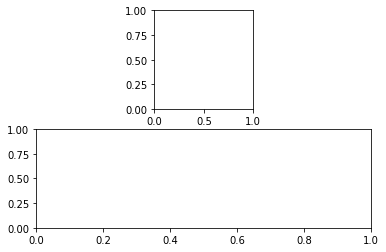

In [40]:
drawTensorEx(x)

In [41]:
x.shape

torch.Size([2, 1, 3, 4, 1])

In [54]:
a = torch.rand( (2,3) )
a

tensor([[0.1011, 0.2988, 0.8175],
        [0.4554, 0.1694, 0.8304]])

In [55]:
b = torch.rand( (2,3) )
b

tensor([[0.3460, 0.0728, 0.6175],
        [0.2505, 0.2457, 0.6954]])

In [56]:
# cat
# dim=0 -> 1차원 기준
ab_cat = torch.cat([a,b],dim=0)
ab_cat, ab_cat.size()

(tensor([[0.1011, 0.2988, 0.8175],
         [0.4554, 0.1694, 0.8304],
         [0.3460, 0.0728, 0.6175],
         [0.2505, 0.2457, 0.6954]]), torch.Size([4, 3]))

1
1


(None, None)

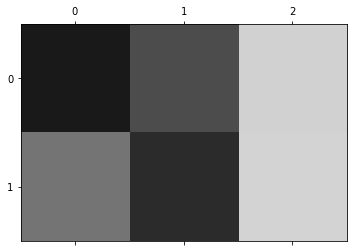

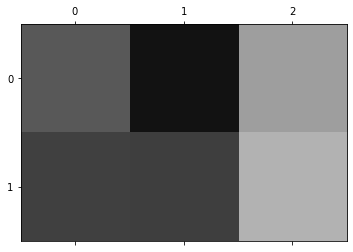

In [57]:
drawTensorEx(a), drawTensorEx(b)

1


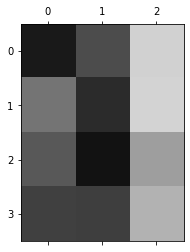

In [58]:
drawTensorEx(ab_cat)

In [59]:
ab_cat2 = torch.cat([a,b],dim=1)
ab_cat2, ab_cat2.size()

(tensor([[0.1011, 0.2988, 0.8175, 0.3460, 0.0728, 0.6175],
         [0.4554, 0.1694, 0.8304, 0.2505, 0.2457, 0.6954]]),
 torch.Size([2, 6]))

In [77]:
# stack => 텐서를 쌓는다 -> 차원을 새로 만들어야한다 -> 차원추가
ab_stack = torch.stack([a,b], dim=0)
ab_stack, ab_stack.size()

(tensor([[[0.1011, 0.2988, 0.8175],
          [0.4554, 0.1694, 0.8304]],
 
         [[0.3460, 0.0728, 0.6175],
          [0.2505, 0.2457, 0.6954]]]), torch.Size([2, 2, 3]))

2


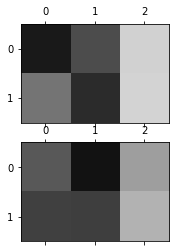

In [78]:
drawTensorEx(ab_stack)

## 텐서의 덧셈,뺄셈,곱셈, 나눗셈, 내적(dot)

In [70]:
x = torch.Tensor([1,2,3])
y = torch.Tensor([4,1,2])
x, y, x.type()

(tensor([1., 2., 3.]), tensor([4., 1., 2.]), 'torch.FloatTensor')

In [73]:
# 덧셈
torch.add(x,y), x + y

(tensor([5., 3., 5.]), tensor([5., 3., 5.]))

In [74]:
# 덧셈
torch.sub(x,y), x - y

(tensor([-3.,  1.,  1.]), tensor([-3.,  1.,  1.]))

In [76]:
# 곱셈
torch.mul(x,y), x * y

(tensor([4., 2., 6.]), tensor([4., 2., 6.]))

In [0]:
# 나눗셈
torch.(x,y), x / y

In [75]:
# 내적
# 12 = 1*4 + 2*1 + 3*2
# 합성곱층에서 커널을 통과시켜서 특성을 추출할때의 계산식하고 동일
torch.dot(x,y)

tensor(12.)

In [79]:
# 텐서에 스칼라연산
# 각구성원에 1씩 더함
x +1

tensor([2., 3., 4.])

In [89]:
# 행렬의 곱
# mm
x = torch.Tensor( [ [1,3],[2,4],[5,7] ] ) #(3,2)
y = torch.Tensor([ [7,9],[10,2] ]) #(2,2)
x.shape, y.shape
torch.mm(x,y)
# 37 = 1*7 + 3*10 = x[0,0]*y[0,0]+x[0,1]*y[1,0]
# 15 = 1*9 + 3*2 = x[0,0]*y[0,1]+x[0,1]*y[1,1]

tensor([[ 37.,  15.],
        [ 54.,  26.],
        [105.,  59.]])

In [90]:
x[0,0]*y[0,1]+x[0,1]*y[1,1]

tensor(15.)

In [88]:
x[0,0]*y[0,0]+x[0,1]*y[1,0]

tensor(37.)

## sum, mean

In [96]:
# (2,2,2)
z = torch.Tensor( [1,2,3,4,5,6,7,8] )
z.size(), z.shape
# z를 2,2,2로 만들어라
z = z.view(2,2,2)
z.size()

torch.Size([2, 2, 2])

In [98]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [97]:
torch.sum(z, dim=0)

tensor([[ 6.,  8.],
        [10., 12.]])

In [99]:
torch.sum(z, dim=1)

tensor([[ 4.,  6.],
        [12., 14.]])

In [103]:
torch.sum(z, dim=2)

tensor([[ 3.,  7.],
        [11., 15.]])

In [104]:
torch.mean(z, dim=0)

tensor([[3., 4.],
        [5., 6.]])

In [102]:
torch.mean(z, dim=1)

tensor([[2., 3.],
        [6., 7.]])

## max, min, argmax, argmin

In [105]:
torch.max(z), torch.min(z)

(tensor(8.), tensor(1.))

In [106]:
# 그 값이 존재하는 위치 값 => 데이터를 flatten 해서 인덱스를 계산했다 (ok)
# flatten(최대값 혹은 최솟값)기준으로 나열해서 인덱스?
torch.argmax(z), torch.argmin(z)

(tensor(7), tensor(0))

In [107]:
# 1차원 기준으로 원소들을 수직으로 배치하고, 위에서 내려봤을때 같은 포지션에 겹치는 원소끼리 비교해서 최댓값을 찾음 => 총결과물 4개
# 그 최댓값과 그 위치값이 결과로 나온다
torch.max(z,dim=0)

torch.return_types.max(values=tensor([[5., 6.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]]))

## 논리연산
- 같다, 크거나 같다, 작거나 같다, 작다 => True, False, BoolTensor

In [108]:
z = torch.Tensor([-4,3,0])
z

tensor([-4.,  3.,  0.])

In [110]:
# BoolTensor 가 결론(True, False)

# 같다
print(z.eq(0))
print(z == 0)

# 크거나 같다
print(z.ge(0))
print(z >= 0)

# 작거나 같다
print(z.le(0))
print(z <= 0)

# 작다
print(z.lt(0))
print(z < 0)

# 크다
print(z.gt(0))
print(z > 0)

tensor([False, False,  True])
tensor([False, False,  True])
tensor([False,  True,  True])
tensor([False,  True,  True])
tensor([ True, False,  True])
tensor([ True, False,  True])
tensor([ True, False, False])
tensor([ True, False, False])
tensor([False,  True, False])
tensor([False,  True, False])
